In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
def z_score_normalize(arr):
    """Z-score标准化"""
    arr = np.array(arr)
    mean_val = arr.mean()
    std_val = arr.std()
    if std_val != 0:
        return ((arr - mean_val) / std_val).tolist()
    else:
        return (arr - mean_val).tolist()
# 计算每个step位置的均值（处理不同长度的序列）
def calculate_step_means(normalized_uncertainties):
    # 找到最大步数
    max_steps = max(len(x) for x in normalized_uncertainties)
    
    step_means = []
    step_stds = []
    step_counts = []
    
    for step_idx in range(max_steps):
        # 收集该步骤的所有值
        step_values = []
        for sample_uncertainty in normalized_uncertainties:
            if step_idx < len(sample_uncertainty):
                step_values.append(sample_uncertainty[step_idx])
        
        if len(step_values) > 0:
            step_means.append(np.mean(step_values))
            step_stds.append(np.std(step_values))
            step_counts.append(len(step_values))
        else:
            step_means.append(np.nan)
            step_stds.append(np.nan)
            step_counts.append(0)
    
    return step_means, step_stds, step_counts
def plot_uncertainty_trend(means, stds, counts):
    steps = range(len(means))
    valid_steps = [i for i, count in enumerate(counts) if count >= 3]  # 只显示样本数>=3的step

    valid_means = [means[i] for i in valid_steps]
    valid_stds = [stds[i] for i in valid_steps]

    plt.plot(valid_steps, valid_means, 'r-o', markersize=4, label='Mean')
    plt.fill_between(valid_steps,
                     [m-s for m,s in zip(valid_means, valid_stds)],
                     [m+s for m,s in zip(valid_means, valid_stds)],
                     alpha=0.3, label='±1 Std')
    plt.xlabel('Step Index')
    plt.ylabel('Normalized Uncertainty (Z-score)')
    plt.title('Step Uncertainty Trend - Z-score Normalization')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 1. Naive

In [163]:
data1 = json.load(open('./res/amei24.json'))
data2 = json.load(open('./res/amei25.json'))
data = data1 + data2

In [166]:
all_step_uncertainties = []
for sample in data:
    step_uncertainty = sample['step_uncertainty']
    if len(step_uncertainty) > 0:  # 确保有数据
        # 取相反数
        step_uncertainty = [-x for x in step_uncertainty]
        all_step_uncertainties.append(step_uncertainty)

print(f"总样本数: {len(all_step_uncertainties)}")
print(f"每个样本的步数范围: {min(len(x) for x in all_step_uncertainties)} - {max(len(x) for x in all_step_uncertainties)}")
all_step_momentum_uncertainties = []
for sample in data:
    step_momentum_uncertainty = sample['step_momentum_uncertainty']
    if len(step_momentum_uncertainty) > 0:  # 确保有数据
        # 取相反数
        step_momentum_uncertainty = [-x for x in step_momentum_uncertainty]
        all_step_momentum_uncertainties.append(step_momentum_uncertainty)
print(f"总样本数: {len(all_step_momentum_uncertainties)}")
print(f"每个样本的步数范围: {min(len(x) for x in all_step_momentum_uncertainties)} - {max(len(x) for x in all_step_momentum_uncertainties)}")

总样本数: 60
每个样本的步数范围: 1 - 17
总样本数: 60
每个样本的步数范围: 1 - 17


## 1.1 Step Uncertainty Analysis （Z-Scroe）

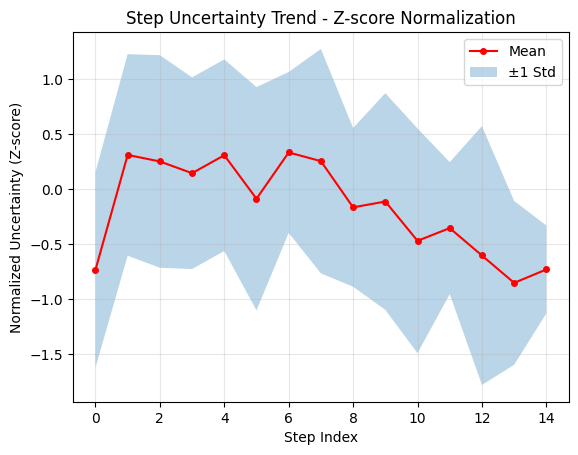

In [ ]:
normalized_uncertainties_zscore = [z_score_normalize(x) for x in all_step_uncertainties]
plot_uncertainty_trend(*calculate_step_means(normalized_uncertainties_zscore))


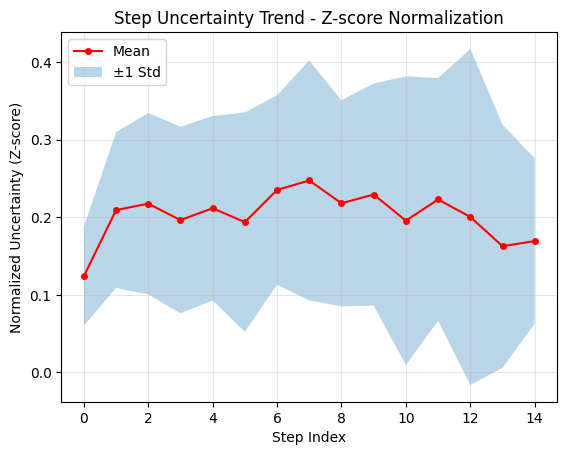

In [167]:
plot_uncertainty_trend(*calculate_step_means(all_step_uncertainties))

## 1.2 Step Momentum Uncertainty Analysis （Z-Score）

In [137]:
# Z-score归一化版本
normalized_momentum_uncertainties_zscore = [z_score_normalize(x) for x in all_step_momentum_uncertainties]

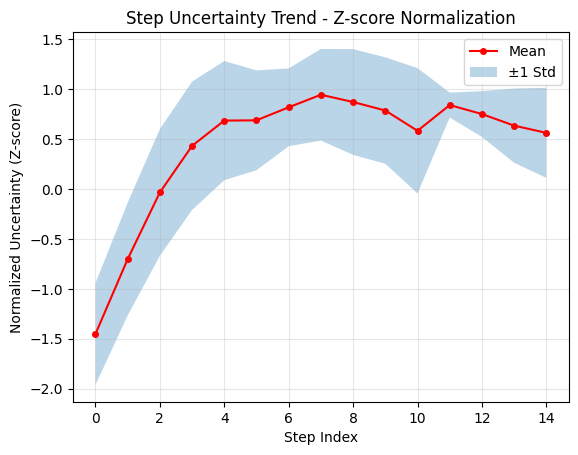

In [138]:
plot_uncertainty_trend(*calculate_step_means(normalized_momentum_uncertainties_zscore))

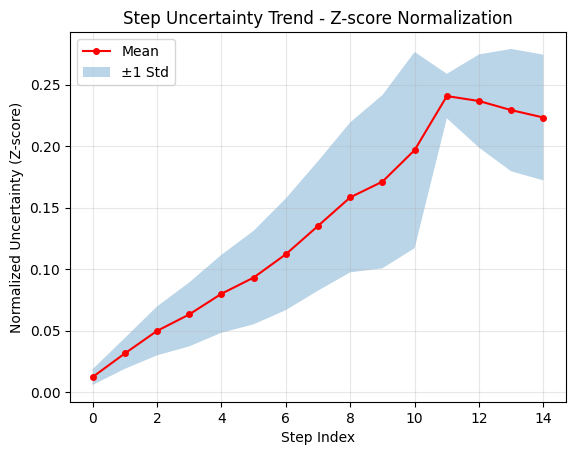

In [168]:
plot_uncertainty_trend(*calculate_step_means(all_step_momentum_uncertainties))

## 1.3 Triger Step Analysis


In [139]:
triger= []
gamma = 0.9  # 设置阈值
for sample in data:
    step_uncertainty = sample['step_uncertainty']
    step_momentum_uncertainty = sample['step_momentum_uncertainty']
    if len(step_uncertainty) > 0:  # 确保有数据
        # index = 0 默认触发
        triger_step =[1]  # 第一个step默认触发
        for i in range(1, len(step_uncertainty)):
            triger_step.append(1 if np.exp(step_uncertainty[i]) < np.exp(step_momentum_uncertainty[i-1])*gamma else 0)
        triger.append(triger_step)


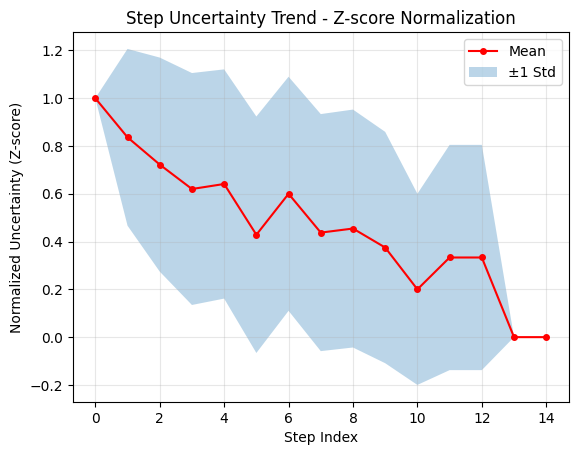

In [140]:
plot_uncertainty_trend(*calculate_step_means(triger))

# Guided Search MUR

In [158]:
data1 = json.load(open('./res/amei24_gsmur.json'))
data2 = json.load(open('./res/amei25_gsmur.json'))
data = data1 + data2

In [159]:
all_step_uncertainties = []
for sample in data:
    step_uncertainty = sample['step_uncertainty']
    if len(step_uncertainty) > 0:  # 确保有数据
        # 取相反数
        step_uncertainty = [-x for x in step_uncertainty]
        all_step_uncertainties.append(step_uncertainty)

print(f"总样本数: {len(all_step_uncertainties)}")
print(f"每个样本的步数范围: {min(len(x) for x in all_step_uncertainties)} - {max(len(x) for x in all_step_uncertainties)}")
all_step_momentum_uncertainties = []
for sample in data:
    step_momentum_uncertainty = sample['step_momentum_uncertainty']
    if len(step_momentum_uncertainty) > 0:  # 确保有数据
        # 取相反数
        step_momentum_uncertainty = [-x for x in step_momentum_uncertainty]
        all_step_momentum_uncertainties.append(step_momentum_uncertainty)
print(f"总样本数: {len(all_step_momentum_uncertainties)}")
print(f"每个样本的步数范围: {min(len(x) for x in all_step_momentum_uncertainties)} - {max(len(x) for x in all_step_momentum_uncertainties)}")

总样本数: 60
每个样本的步数范围: 1 - 11
总样本数: 60
每个样本的步数范围: 1 - 11


## Step Uncertainty Analysis （Z-Scroe）

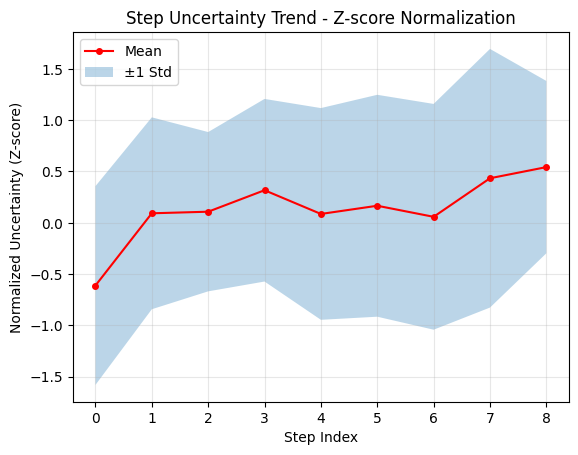

In [161]:
normalized_uncertainties_zscore = [z_score_normalize(x) for x in all_step_uncertainties]
plot_uncertainty_trend(*calculate_step_means(normalized_uncertainties_zscore))


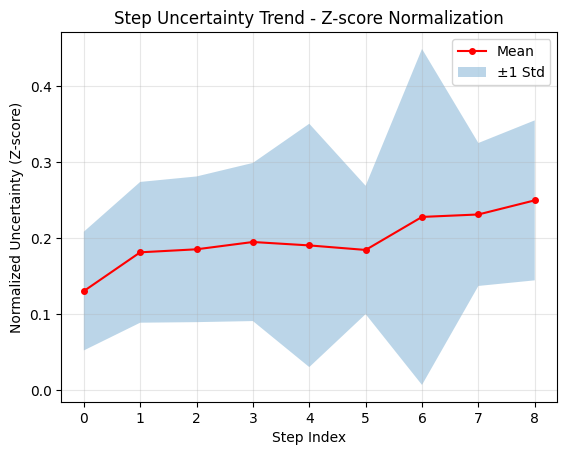

In [162]:
plot_uncertainty_trend(*calculate_step_means(all_step_uncertainties))

## Step Momentum Uncertainty Analysis （Z-Score）

In [144]:
# Z-score归一化版本
normalized_momentum_uncertainties_zscore = [z_score_normalize(x) for x in all_step_momentum_uncertainties]

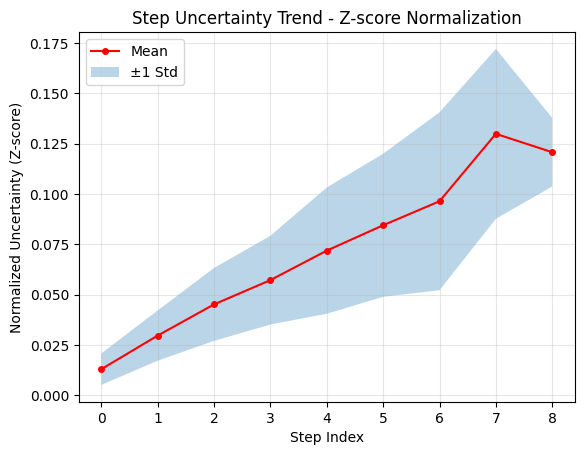

In [160]:
plot_uncertainty_trend(*calculate_step_means(all_step_momentum_uncertainties))

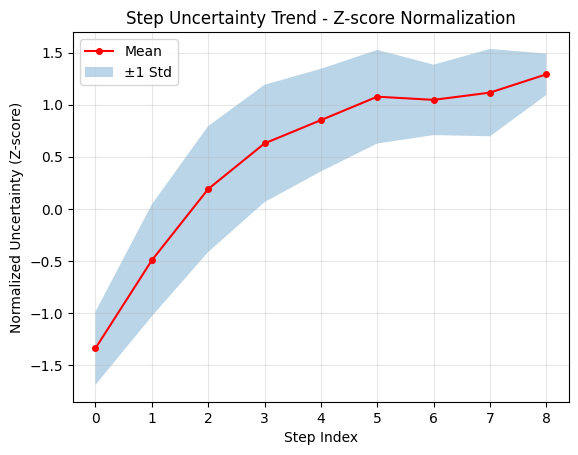

In [145]:
plot_uncertainty_trend(*calculate_step_means(normalized_momentum_uncertainties_zscore))

## Triger Step Analysis


In [146]:
triger= []
gamma = 0.9  # 设置阈值
for sample in data:
    step_uncertainty = sample['step_uncertainty']
    step_momentum_uncertainty = sample['step_momentum_uncertainty']
    if len(step_uncertainty) > 0:  # 确保有数据
        # index = 0 默认触发
        triger_step =[1]  # 第一个step默认触发
        for i in range(1, len(step_uncertainty)):
            triger_step.append(1 if np.exp(step_uncertainty[i]) < np.exp(step_momentum_uncertainty[i-1])*gamma else 0)
        triger.append(triger_step)


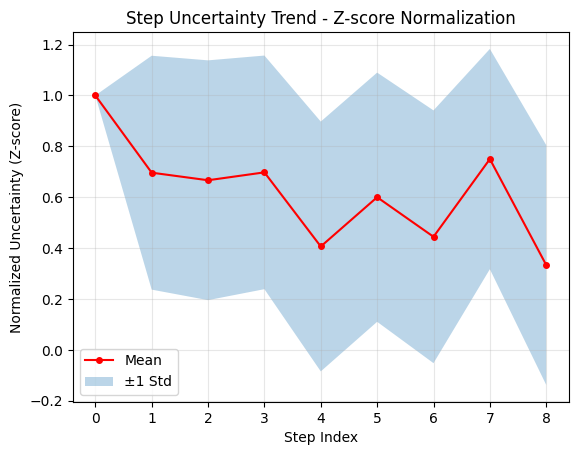

In [147]:
plot_uncertainty_trend(*calculate_step_means(triger))